In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
df=pd.read_csv("/content/advertising.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There in no null value in the data set

<Axes: >

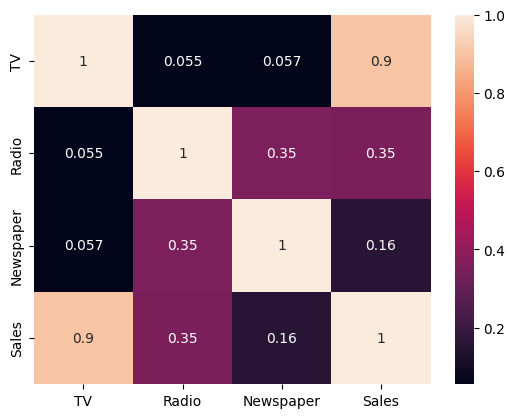

In [7]:
sns.heatmap(df.corr(),annot=True)

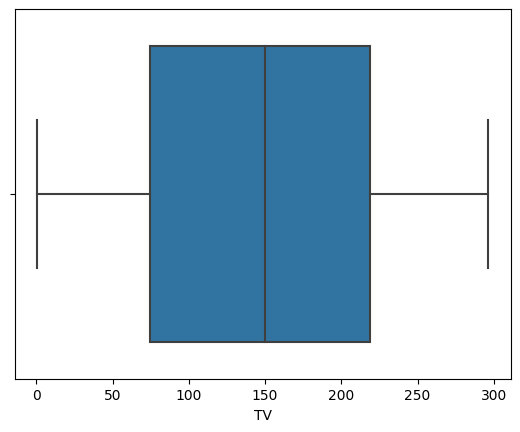

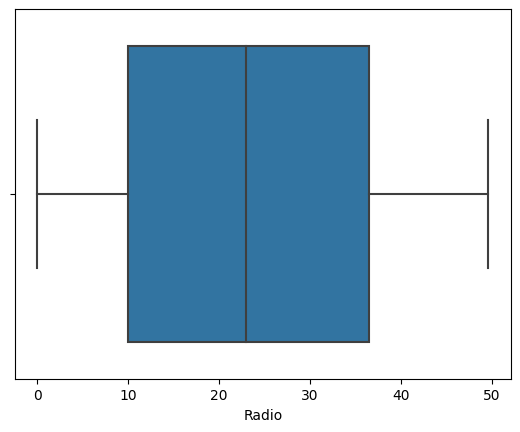

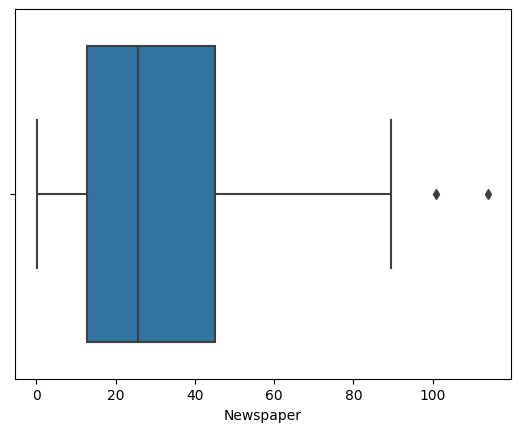

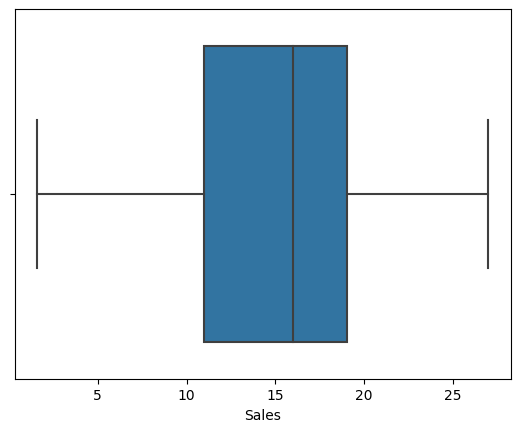

In [18]:
for column in df.columns:
  plt.figure()
  sns.boxplot(x=column,data=df)

From the newspaper boxplot it can be seen that the newspaper field have the outliers

In [63]:
Q1 = df['Newspaper'].quantile(0.25)
Q3 = df['Newspaper'].quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
upper = np.where(df['Newspaper']>=upper)[0]

In [64]:
df.drop(index=upper, inplace=True)

<Axes: xlabel='Newspaper'>

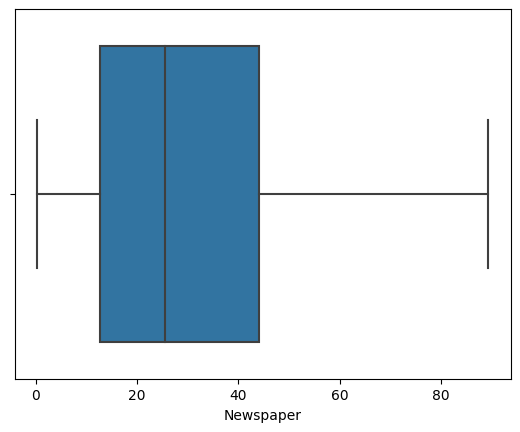

In [65]:
 sns.boxplot(x="Newspaper",data=df)

Now there is not any outliers present


In [66]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [68]:
x_train.shape,x_test.shape

((138, 3), (60, 3))

In [69]:
model=LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
y_test_predicted=model.predict(x_test)
mean_squared_error(y_test,y_test_predicted)

3.490124707181416

In [72]:
r2_score(y_test,y_test_predicted)

0.8766267988375496

In [73]:
model.score(x_test,y_test)

0.8766267988375496

Model 2-Support vector machine

In [53]:
from sklearn.svm import SVR

In [74]:
model2=SVR()

In [75]:
model2.fit(x_train,y_train)

SVR()

In [76]:
predicted_y_test=model2.predict(x_test)

In [77]:
r2_score(y_test,predicted_y_test)

0.8557810069424213

Data Analysis

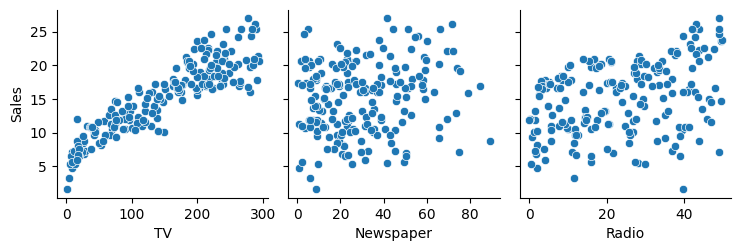

In [78]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',kind='scatter')
plt.show()